# Reinforcement Learning

Reinforcement Learning for CleanTech Optimization:
- Introduction to reinforcement learning and its applications in CleanTech
- Markov Decision Process (MDP) framework for modeling CleanTech systems
- Implementation of reinforcement learning algorithms, such as Q-learning
- Applying reinforcement learning to optimize energy management, resource allocation, and sustainability in CleanTech

#### This notebook aims to mix the concepts of reinforcement learning with the clean energy benefits found in smart grids. 

In other words, the goal of this project is to create a clean energy management system in smart grids using reinforcement learning. This is the general guide/roadmap:
- Researching existing Smart Grid Systems and Energy Management Systems.
- Developing a Reinforcement Learning algorithm to optimize energy management.
- Testing the developed algorithm and making improvements based on additional data.
- Optimizing the algorithm runtime performance and assessing areas for improvement.
- Researching other variables that can improve the quality of energy management.
- Accounting for additional variables in the Reinforcement Learning algorithm.

# What are smart grids?

To put it simply, smart grids are systems that manage electricity distribution on a large scale. They use all sorts of tools and networks to analytically optimize energy consumption and inegrate renewable resources in the most efficient way possible. 

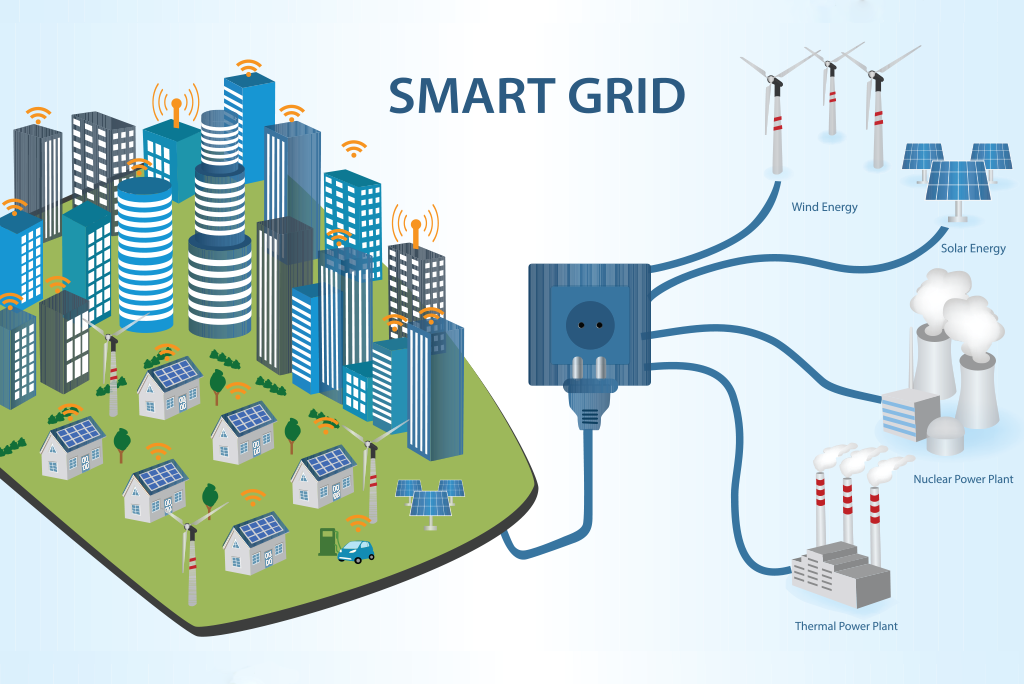

## Consider the Following:

Let's pretend we live in a 2-D grid world, and we have built our smart grid off of it. There are also 4 notable items in our smart grid world. In the bottom left corner, we have our power sources, where the electricity comes from. This will be our starting point. Diagonal from that, we have a black square, which just blocks off any passages (this helps demonstrate how reinforcement learning works). Then, in the top right corner, we have the home, which is our end goal. Within our smart grid, we want to have the electricity go from the power source to the home. However, right below the home, we have some volatile item that will explode if electricity touches it! We need to be careful and avoid it at all costs.

To give you an idea of this grid, take a look at the following illustration:

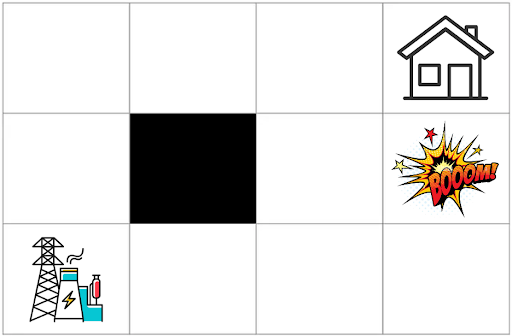

As you can see, the board has 3 rows and 4 columns (a 3x4 grid).

### Objective

The objective is quite simple. We want the electricity coming from our source (this acts as the agent) in the bottom-left corner to go to the house, however the episode would also end if we touch the boom. 

The house has a reward of +1, the boom has a reward of -1.

At each step, our agent/electricity can flow up, down, left or right.

If the agent hits a wall (ie try to move down when starting at the source), it will remain in the same spot.

<!-- Lastly, it should be noted that this RL implementation assumes each action is deterministic, meaning our agent will go where it intends to. -->

For a more RL-focused grid diagram, consider the following: 

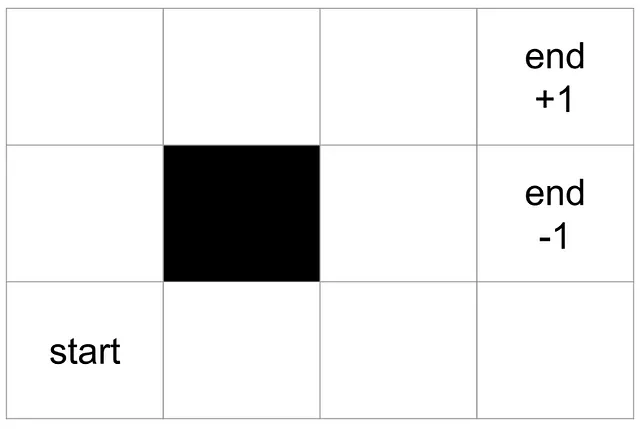

To get started, let's first establish our board dimensions. 

In [2]:
import numpy as np

# global variables
BOARD_ROWS = 3
BOARD_COLS = 4
WIN_STATE = (0, 3)
LOSE_STATE = (1, 3)
START = (2, 0)
DETERMINISTIC = True

Next, we need to list out some states that our grid could be in. 

More specifically, the state represents the position of our agent, and gives rewards according to its state. 

The states that we are mainly concerned with are the home (reward of +1), and the boom (reward of -1).

In [3]:
def giveReward(self):
    if self.state == WIN_STATE:
        return 1
    elif self.state == LOSE_STATE:
        return -1
    else:
        return 0

When it comes to the agent's action, the grid should have a function that accepts an action, and returns the position of the next state. 

In [4]:
def nxtPosition(self, action):
    """
    action: up, down, left, right
    -------------
    0 | 1 | 2| 3|
    1 |
    2 |
    return next position
    """
    if self.determine:
        if action == "up":
            nxtState = (self.state[0] - 1, self.state[1])
        elif action == "down":
            nxtState = (self.state[0] + 1, self.state[1])
        elif action == "left":
            nxtState = (self.state[0], self.state[1] - 1)
        else:
            nxtState = (self.state[0], self.state[1] + 1)
        # if next state legal
        if (nxtState[0] >= 0) and (nxtState[0] <= (BOARD_ROWS -1)):
            if (nxtState[1] >= 0) and (nxtState[1] <= (BOARD_COLS -1)):
                if nxtState != (1, 1):
                    return nxtState
        return self.state

### The Learning Process

Now you might be wondering, how does our agent actually learn the path to navigate? This is where reinforcement learning comes in, where our agent must be able to learn and adapt from its past experiences and think like a human. The concept that makes all of this work is called value iteration. 

Ultimately, our agent must learn a plan. This plan acts like a guidebook, telling the agent what actions to take in different situations. In our situation, we're not directly teaching the agent what action to take in each situation. Instead, we'll use a method called value iteration to first figure out how valuable each situation is (like how much reward it might bring). Then, when the agent encounters a situation, it will pick the action that seems to lead to the best outcome based on these values.

The formula behind value iteration is the following:

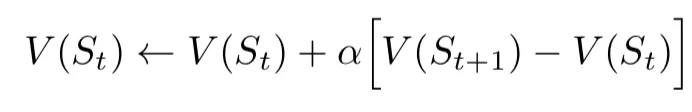

- V stands for value
- S stands for state
- t represents the time




V(St) on the left is the updated value

The terms on the right is the current non-updated value, with α being the learning rate.

Descriptively, the formula simply states that the updated value of a state is the sum of the current value plus the difference between what the agent learned from the upcoming iteration minus the current estimate multiplied by the learning rate.

We will run this gridworld over 50 times, each time resulting in either a reward of +1 and -1. Hopefully, there will be more +1s than -1s, especially as time progresses and reinforcement learning kicks into effect. 

Ultimately, the resulting values that we get for our grid are the estimated values at each particular state.  

### Exploration vs Exploitation

There's one last thing that should be mentioned before diving deep into the code.

Once our agent finds a certain pathway to the +1 reward, should it follow that path forever (exploitation), or should it take a risk and give other paths a chance (exploration)?

Well, the truth is, we should have a balance between exploration and exploitation. 
Our agent will choose a particular action based on the ```exploration_rate``` value. (Here, our exp_rate is 0.3). 

In [5]:
class State:
    def __init__(self, state=START):
        self.board = np.zeros([BOARD_ROWS, BOARD_COLS])
        self.board[1, 1] = -1
        self.state = state
        self.isEnd = False
        self.determine = DETERMINISTIC

    def giveReward(self):
        if self.state == WIN_STATE:
            return 1
        elif self.state == LOSE_STATE:
            return -1
        else:
            return 0

    def isEndFunc(self):
        if (self.state == WIN_STATE) or (self.state == LOSE_STATE):
            self.isEnd = True

    def nxtPosition(self, action):
        """
        action: up, down, left, right
        -------------
        0 | 1 | 2| 3|
        1 |
        2 |
        return next position
        """
        if self.determine:
            if action == "up":
                nxtState = (self.state[0] - 1, self.state[1])
            elif action == "down":
                nxtState = (self.state[0] + 1, self.state[1])
            elif action == "left":
                nxtState = (self.state[0], self.state[1] - 1)
            else:
                nxtState = (self.state[0], self.state[1] + 1)
            # if next state legal
            if (nxtState[0] >= 0) and (nxtState[0] <= (BOARD_ROWS -1)):
                if (nxtState[1] >= 0) and (nxtState[1] <= (BOARD_COLS -1)):
                    if nxtState != (1, 1):
                        return nxtState
            return self.state

    def showBoard(self):
        self.board[self.state] = 1
        for i in range(0, BOARD_ROWS):
            print('-----------------')
            out = '| '
            for j in range(0, BOARD_COLS):
                if self.board[i, j] == 1:
                    token = '*'
                if self.board[i, j] == -1:
                    token = 'z'
                if self.board[i, j] == 0:
                    token = '0'
                out += token + ' | '
            print(out)
        print('-----------------')


# Agent of player

class Agent:

    def __init__(self):
        self.states = []
        self.actions = ["up", "down", "left", "right"]
        self.State = State()
        self.lr = 0.2
        self.exp_rate = 0.3

        # initial state reward
        self.state_values = {}
        for i in range(BOARD_ROWS):
            for j in range(BOARD_COLS):
                self.state_values[(i, j)] = 0  # set initial value to 0

    def chooseAction(self):
        # choose action with most expected value
        mx_nxt_reward = 0
        action = ""

        if np.random.uniform(0, 1) <= self.exp_rate:
            action = np.random.choice(self.actions)
        else:
            # greedy action
            for a in self.actions:
                # if the action is deterministic
                nxt_reward = self.state_values[self.State.nxtPosition(a)]
                if nxt_reward >= mx_nxt_reward:
                    action = a
                    mx_nxt_reward = nxt_reward
        return action

    def takeAction(self, action):
        position = self.State.nxtPosition(action)
        return State(state=position)

    def reset(self):
        self.states = []
        self.State = State()

    def play(self, rounds=10):
        i = 0
        while i < rounds:
            # to the end of game back propagate reward
            if self.State.isEnd:
                # back propagate
                reward = self.State.giveReward()
                # explicitly assign end state to reward values
                self.state_values[self.State.state] = reward  # this is optional
                print("Game End Reward", reward, '\n')
                for s in reversed(self.states):
                    reward = self.state_values[s] + self.lr * (reward - self.state_values[s])
                    self.state_values[s] = round(reward, 3)
                self.reset()
                i += 1
            else:
                action = self.chooseAction()
                # append trace
                self.states.append(self.State.nxtPosition(action))
                print("current position {} action {}".format(self.State.state, action))
                # by taking the action, it reaches the next state
                self.State = self.takeAction(action)
                # mark is end
                self.State.isEndFunc()
                print("nxt state", self.State.state)
                print("---------------------")

    def showValues(self):
        for i in range(0, BOARD_ROWS):
            print('----------------------------------')
            out = '| '
            for j in range(0, BOARD_COLS):
                out += str(self.state_values[(i, j)]).ljust(6) + ' | '
            print(out)
        print('----------------------------------')


if __name__ == "__main__":
    ag = Agent()
    ag.play(50)
    print(ag.showValues())

current position (2, 0) action right
nxt state (2, 1)
---------------------
current position (2, 1) action right
nxt state (2, 2)
---------------------
current position (2, 2) action down
nxt state (2, 2)
---------------------
current position (2, 2) action right
nxt state (2, 3)
---------------------
current position (2, 3) action right
nxt state (2, 3)
---------------------
current position (2, 3) action down
nxt state (2, 3)
---------------------
current position (2, 3) action up
nxt state (1, 3)
---------------------
Game End Reward -1 

current position (2, 0) action left
nxt state (2, 0)
---------------------
current position (2, 0) action down
nxt state (2, 0)
---------------------
current position (2, 0) action left
nxt state (2, 0)
---------------------
current position (2, 0) action down
nxt state (2, 0)
---------------------
current position (2, 0) action down
nxt state (2, 0)
---------------------
current position (2, 0) action left
nxt state (2, 0)
---------------------
cu